In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df_store=pd.read_csv('./Data_Files/store.csv')
df_sales=pd.read_csv('./Data_Files/train.csv',parse_dates =['Date'])

### Target Variable Analysis - Sales

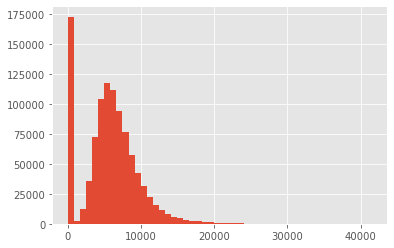

In [41]:
plt.style.use('ggplot')
plt.hist(df_sales['Sales'], bins=50)
plt.show()

# df_sales2=df_sales[df_sales['Sales']<df_sales['Sales'].quantile(.99)] 
# df_sales2=df_sales2[df_sales2['Sales']!=0]
# plt.style.use('ggplot')
# plt.hist(df_sales2['Sales'], bins=50)
# plt.show()

#### Box Plot showing the outliers

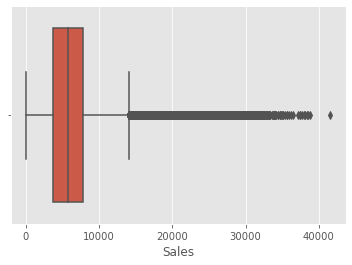

In [8]:
sns.boxplot(x='Sales', data=df_sales)
plt.show()

In [79]:
train_dataset = df_sales.merge(df_store, how='left', on='Store')
train_dataset["StateHoliday"] = train_dataset["StateHoliday"].apply(lambda x: 0 if x == '0' or x == '0' else 1)
train_dataset["Year"] = train_dataset.Date.dt.year
train_dataset["Month"] = train_dataset.Date.dt.month
train_dataset["Day"] = train_dataset.Date.dt.day
train_dataset["MonthYear"] = train_dataset.Date.apply(lambda x:str(x)[:7])

In [92]:
train_dataset.SchoolHoliday.unique()

array([1, 0], dtype=int64)

## Average Sales for Different features

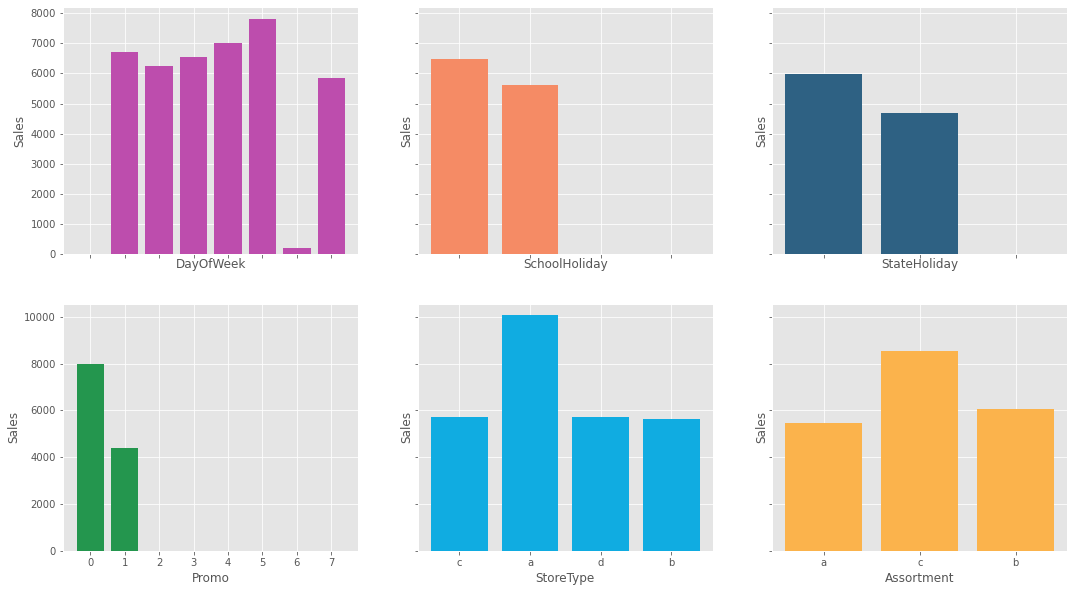

In [89]:
columns =['DayOfWeek','SchoolHoliday','StateHoliday','Promo','StoreType','Assortment']
colors = ['#bd4dad','#f58b65','#2e6183','#24964e','#10ace1','#fbb34c']

rows, cols = 2, 3
fig, ax = plt.subplots(rows, cols,
                       sharex='col', 
                       sharey='row')

fig.set_size_inches(18, 10)
i=0
for row in range(rows):
    for col in range(cols):
        
        ax[row, col].bar(train_dataset[columns[i]].unique(),train_dataset.groupby(columns[i]).mean()['Sales'],color=colors[i])
        ax[row, col].set(xlabel=columns[i], ylabel='Sales')
        i +=1

plt.show()

### Average Sales & Customer per month

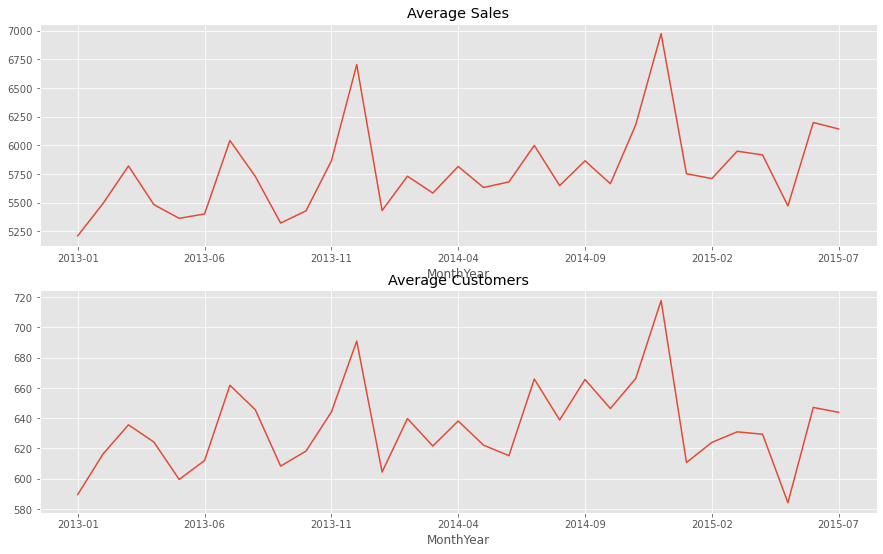

In [64]:
fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(15,9))
average_sales_per_day=train_dataset.groupby('MonthYear')['Sales'].mean()
average_customer_per_day=train_dataset.groupby('MonthYear')['Customers'].mean()
average_sales_per_day.plot(kind='line',ax=ax1,title="Average Sales")
average_customer_per_day.plot(kind='line',ax=ax2,title="Average Customers")


We can see that the avg sales and avg customer pattern is similar.

Text(0.5, 1.0, 'Average Customers Per Month')

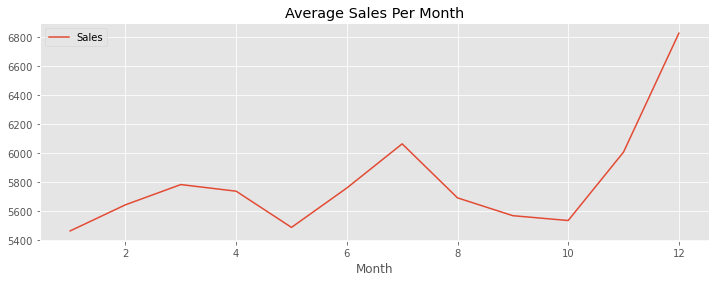

<Figure size 432x288 with 0 Axes>

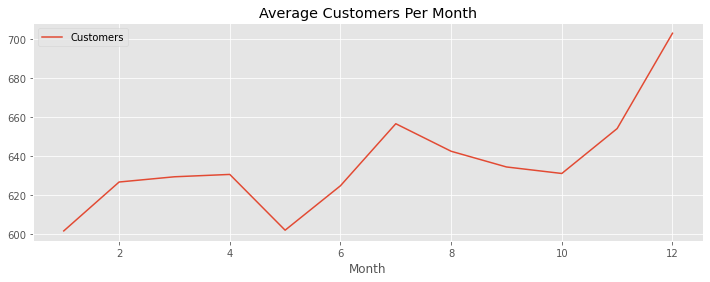

In [81]:
axis = train_dataset.groupby('Month')[['Sales']].mean().plot(figsize = (12,4))
axis.set_title('Average Sales Per Month')

plt.figure()
axis = train_dataset.groupby('Month')[['Customers']].mean().plot(figsize = (12,4))
axis.set_title('Average Customers Per Month')

Most of the Sales are in November and December and least in January

Text(0.5, 1.0, 'Average Sales Per Day')

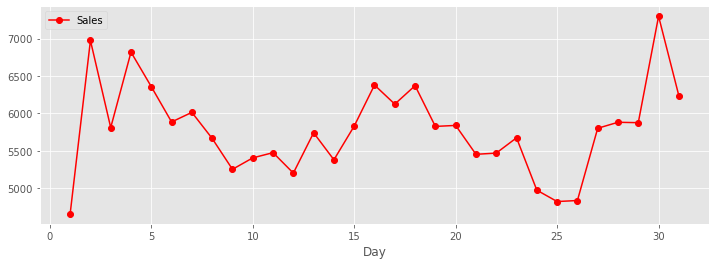

<Figure size 432x288 with 0 Axes>

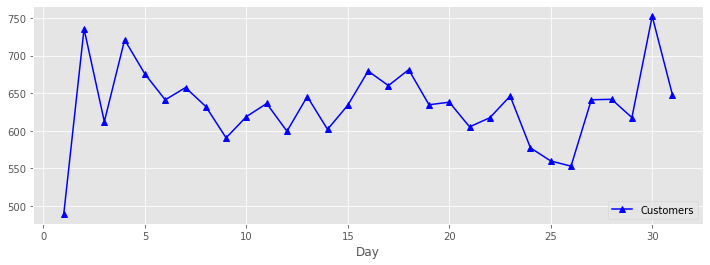

In [83]:
ax = train_dataset.groupby('Day')[['Sales']].mean().plot(figsize = (12,4), marker = 'o', color = 'r')
axis.set_title('Average Sales Per Day')

plt.figure()
ax = train_dataset.groupby('Day')[['Customers']].mean().plot(figsize = (12,4), marker = '^', color = 'b')
axis.set_title('Average Sales Per Day')

Here we can deduce that most people shop in sratrt or end of month . Lowest being around 25th

Text(0.5, 1.0, 'customers across different days of the week ')

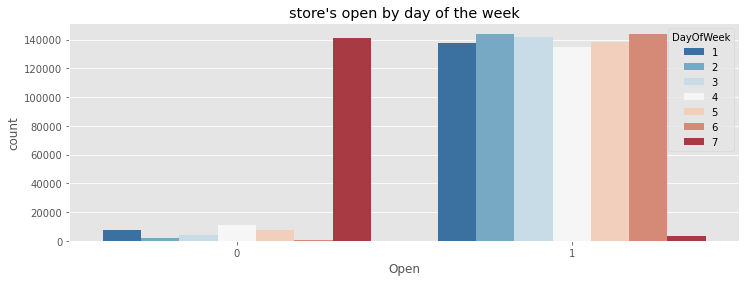

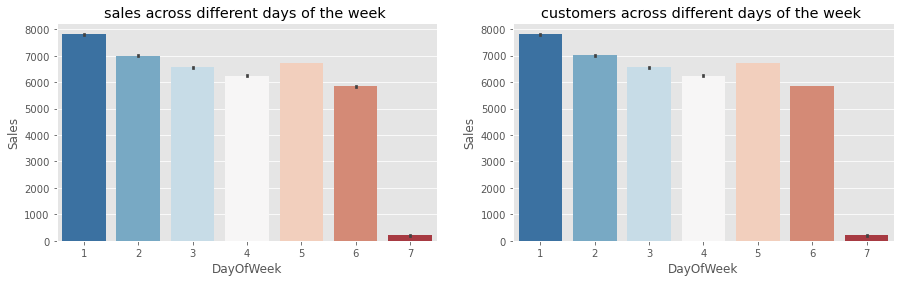

In [86]:
fig, (axis1) = plt.subplots(1,1,figsize=(12,4))
sns.countplot(x='Open',hue='DayOfWeek', data=train_dataset, ax=axis1, palette = 'RdBu_r')
plt.title("store's open by day of the week")
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='DayOfWeek', y='Sales', data=train_dataset, palette = 'RdBu_r', ax=axis1).set_title('sales across different days of the week ')
sns.barplot(x='DayOfWeek', y='Sales', data=train_dataset, palette = 'RdBu_r', ax=axis2).set_title('customers across different days of the week ')

Most of the ctores are closed on Sunday

### Co-relation Matrix for all Columns

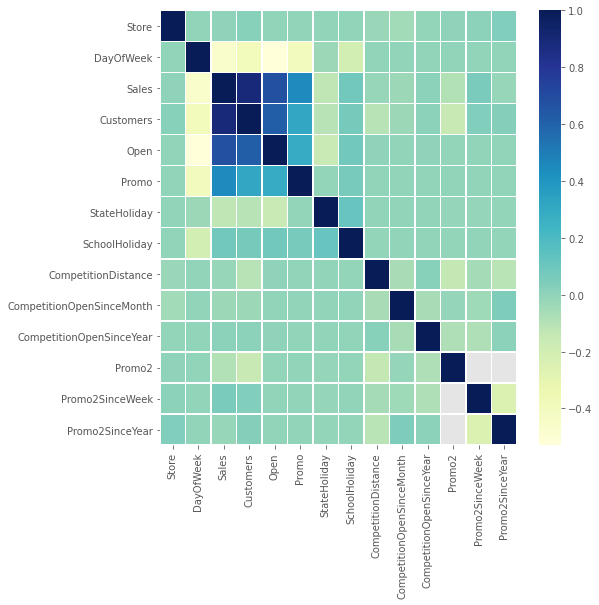

In [71]:
fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
corrMatrix = train_dataset.corr()
sns.heatmap(corrMatrix,linewidths=.5, ax=ax,cmap="YlGnBu")
plt.show()

Sales is highly co-related with customers, promo, Open